In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
np.set_printoptions(suppress=True)
#%matplotlib inline 

In [2]:
df = pd.read_excel('DHAntnn.xlsx')
df

,DU,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
0,22.70,5.88,1.07,0.63,0.51,0.29,0.12,0,0.00,1.88,...,0,0,0,0,0.37,11.79,6.45,9.24,8.86,1.56
1,10.45,0.35,1.48,0.69,0.52,0.33,0.16,0,0.09,2.63,...,0,0,0,0,0.41,14.28,6.72,8.09,3.97,1.09
2,11.38,0.34,1.23,0.72,0.53,0.31,0.14,0,0.00,1.20,...,0,0,0,0,0.47,18.92,4.98,6.45,3.30,0.82
3,4.47,0.32,1.38,0.64,0.48,0.30,0.19,0,0.04,2.52,...,0,0,0,0,0.35,7.35,6.18,9.22,15.75,0.42
4,11.71,14.75,1.33,0.63,0.49,0.30,0.16,0,0.08,2.12,...,0,0,0,0,0.34,12.40,5.98,7.21,3.55,0.86
5,4.50,0.22,13.33,0.52,0.41,0.23,0.11,0,0.06,2.68,...,0,0,0,0,0.33,6.06,4.85,14.86,3.34,2.09
6,7.40,0.24,0.74,7.03,0.52,0.29,0.19,0,0.02,3.41,...,0,0,0,0,0.48,19.29,6.65,5.69,2.36,0.82
7,16.00,0.80,1.58,6.85,0.60,0.06,0.08,0,0.00,1.27,...,0,0,0,0,0.18,17.27,3.79,6.12,3.05,0.23


In [3]:
Y = df.loc[:, 'DU']

In [4]:
Y

0    22.70
1    10.45
2    11.38
3     4.47
4    11.71
5     4.50
6     7.40
7    16.00
Name: DU, dtype: float64

In [5]:
X = df.drop(['DU'], axis=1)

In [6]:
X

,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
0,5.88,1.07,0.63,0.51,0.29,0.12,0,0.00,1.88,15.10,...,0,0,0,0,0.37,11.79,6.45,9.24,8.86,1.56
1,0.35,1.48,0.69,0.52,0.33,0.16,0,0.09,2.63,9.42,...,0,0,0,0,0.41,14.28,6.72,8.09,3.97,1.09
2,0.34,1.23,0.72,0.53,0.31,0.14,0,0.00,1.20,12.96,...,0,0,0,0,0.47,18.92,4.98,6.45,3.30,0.82
3,0.32,1.38,0.64,0.48,0.30,0.19,0,0.04,2.52,10.81,...,0,0,0,0,0.35,7.35,6.18,9.22,15.75,0.42
4,14.75,1.33,0.63,0.49,0.30,0.16,0,0.08,2.12,8.44,...,0,0,0,0,0.34,12.40,5.98,7.21,3.55,0.86
5,0.22,13.33,0.52,0.41,0.23,0.11,0,0.06,2.68,6.85,...,0,0,0,0,0.33,6.06,4.85,14.86,3.34,2.09
6,0.24,0.74,7.03,0.52,0.29,0.19,0,0.02,3.41,9.37,...,0,0,0,0,0.48,19.29,6.65,5.69,2.36,0.82
7,0.80,1.58,6.85,0.60,0.06,0.08,0,0.00,1.27,11.31,...,0,0,0,0,0.18,17.27,3.79,6.12,3.05,0.23


In [7]:
print(df.dtypes)

DU                    float64
Naphthene C5          float64
Naphthene C6          float64
Naphthene C7          float64
Naphthene C8          float64
Naphthene C9          float64
Naphthene C10         float64
Naphthene C11+          int64
Napthene Poly         float64
Parafine C4           float64
Parafine C5           float64
Parafine C6           float64
Parafine C7           float64
Parafine C8           float64
Parafine C9           float64
Parafine C10          float64
Parafine C11+         float64
Parafine Poly           int64
Cyclo Olefine C5      float64
Cyclo Olefine C6      float64
Cyclo Olefine C7      float64
Cyclo Olefine C8      float64
Cyclo Olefine C9      float64
Cyclo Olefine C10     float64
Cyclo Olefine C11+      int64
Cyclo Olefine Poly      int64
Olefine C4            float64
Olefine C5            float64
Olefine C6            float64
Olefine C7            float64
Olefine C8            float64
Olefine C9            float64
Olefine C10           float64
Olefine C1

In [8]:
df['Naphthene C11+'] = df['Naphthene C11+'].astype(float)
df['Parafine Poly'] = df['Parafine Poly'].astype(float)
df['Cyclo Olefine C11+'] = df['Cyclo Olefine C11+'].astype(float)

df['Cyclo Olefine Poly'] = df['Cyclo Olefine Poly'].astype(float)
df['Olefine C11+'] = df['Olefine C11+'].astype(float)
df['Olefine Poly'] = df['Olefine Poly'].astype(float)

df['Oxygenates C3'] = df['Oxygenates C3'].astype(float)
df['Oxygenates C8'] = df['Oxygenates C8'].astype(float)
df['Oxygenates C9'] = df['Oxygenates C9'].astype(float)
df['Oxygenates C10'] = df['Oxygenates C10'].astype(float)
df['Oxygenates C11+'] = df['Oxygenates C11+'].astype(float)

In [9]:
print(df.dtypes)

DU                    float64
Naphthene C5          float64
Naphthene C6          float64
Naphthene C7          float64
Naphthene C8          float64
Naphthene C9          float64
Naphthene C10         float64
Naphthene C11+        float64
Napthene Poly         float64
Parafine C4           float64
Parafine C5           float64
Parafine C6           float64
Parafine C7           float64
Parafine C8           float64
Parafine C9           float64
Parafine C10          float64
Parafine C11+         float64
Parafine Poly         float64
Cyclo Olefine C5      float64
Cyclo Olefine C6      float64
Cyclo Olefine C7      float64
Cyclo Olefine C8      float64
Cyclo Olefine C9      float64
Cyclo Olefine C10     float64
Cyclo Olefine C11+    float64
Cyclo Olefine Poly    float64
Olefine C4            float64
Olefine C5            float64
Olefine C6            float64
Olefine C7            float64
Olefine C8            float64
Olefine C9            float64
Olefine C10           float64
Olefine C1

In [10]:
pca=PCA()
df_pca=pca.fit_transform(X=X)
#df_pca=pca.fit(X).transform(X)

In [11]:
# Store as dataframe and print
df_pca=pd.DataFrame(df_pca)
print(df_pca.shape) 
df_pca.round(2).head()

(8, 8)


,0,1,2,3,4,5,6,7
0,3.13,6.48,3.80,-1.31,6.32,0.91,-0.23,0.0
1,-1.38,-2.96,1.55,-4.39,-1.20,-2.51,-2.84,0.0
2,-5.52,-1.45,1.60,-4.83,-0.93,-0.82,3.02,0.0
3,7.83,1.57,8.34,3.33,-3.91,0.16,0.31,0.0
4,1.27,10.25,-8.26,0.50,-2.35,-0.80,-0.00,0.0


In [12]:
df_pca.round(2) 
#The pca has been built.
#The first column is the first PC and so on

,0,1,2,3,4,5,6,7
0,3.13,6.48,3.80,-1.31,6.32,0.91,-0.23,0.0
1,-1.38,-2.96,1.55,-4.39,-1.20,-2.51,-2.84,0.0
2,-5.52,-1.45,1.60,-4.83,-0.93,-0.82,3.02,0.0
3,7.83,1.57,8.34,3.33,-3.91,0.16,0.31,0.0
4,1.27,10.25,-8.26,0.50,-2.35,-0.80,-0.00,0.0
5,11.44,-8.80,-5.78,0.14,1.29,0.61,0.47,0.0
6,-8.05,-1.86,-0.78,0.33,-1.28,4.97,-0.88,0.0
7,-8.72,-3.22,-0.48,6.23,2.07,-2.51,0.16,0.0


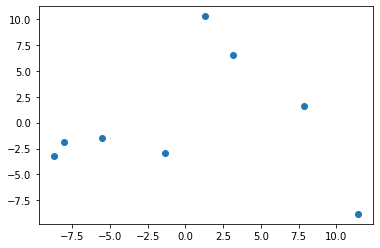

In [13]:
plt.scatter(df_pca[0], df_pca[1])
plt.show()

In [46]:
#plt.xlabel('PC1', fontsize=16)
#plt.ylabel('PC2', fontsize=16)
fig = px.scatter(df_pca, x=0, y=1, color=df['DU'])

plt.savefig('PCA.png', dpi=60)
fig.show()
#https://plotly.com/python/pca-visualization/

<Figure size 432x288 with 0 Axes>

In [15]:
# Principal Components Weights (Eigenvectors)
#Step 1: Get the Weights (aka, loadings or eigenvectors).
df_pca_loadings=pd.DataFrame(pca.components_)
df_pca_loadings.round(2)

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.08,0.37,-0.29,-0.01,0.00,0.00,0.00,0.00,0.03,-0.10,...,0.0,0.0,0.0,0.0,-0.00,-0.66,0.02,0.36,0.33,0.05
1,0.73,-0.43,-0.12,0.00,0.00,0.00,-0.00,0.00,-0.02,0.16,...,-0.0,-0.0,-0.0,-0.0,0.00,0.00,0.07,-0.18,0.23,-0.02
2,-0.51,-0.36,-0.04,0.00,0.00,0.00,0.00,-0.00,-0.01,0.32,...,0.0,0.0,0.0,0.0,0.00,-0.01,0.05,-0.09,0.65,-0.04
3,0.03,0.04,0.42,0.00,-0.02,-0.00,0.00,-0.00,-0.01,-0.10,...,-0.0,-0.0,-0.0,-0.0,-0.02,-0.25,-0.13,-0.02,0.31,-0.07
4,0.03,0.21,0.06,0.00,-0.01,-0.01,0.00,-0.01,-0.08,0.43,...,-0.0,-0.0,-0.0,-0.0,-0.01,0.01,-0.07,0.20,-0.20,0.09
5,-0.21,0.08,0.40,-0.01,0.01,0.01,-0.00,-0.00,0.21,-0.08,...,-0.0,-0.0,-0.0,-0.0,0.02,0.17,0.19,0.01,0.03,0.05
6,-0.07,0.30,-0.25,-0.00,-0.01,-0.01,-0.00,-0.01,-0.28,0.49,...,0.0,0.0,0.0,0.0,0.00,0.25,-0.36,0.01,0.08,-0.03
7,-0.15,-0.32,0.30,-0.09,0.05,0.04,-0.02,-0.02,-0.24,0.16,...,-0.0,-0.0,-0.0,-0.0,-0.02,-0.49,-0.22,-0.01,-0.39,-0.18


In [34]:
#fig, ax = df_pca.biplot(n_feat=4)
fig = px.scatter(df_pca, x=0, y=1, color=df['DU'])

for i, feature in enumerate(X):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=df_pca_loadings[i, 0],
        y1=df_pca_loadings[i, 1]
    )
    fig.add_annotation(
        x=df_pca_loadings[i, 0],
        y=df_pca_loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

InvalidIndexError: (0, 0)

In [16]:
#Step 2: Compute the mean centered data.
X_mean = X - X.mean()
X_mean.round(2)

,Naphthene C5,Naphthene C6,Naphthene C7,Naphthene C8,Naphthene C9,Naphthene C10,Naphthene C11+,Napthene Poly,Parafine C4,Parafine C5,...,Oxygenates C8,Oxygenates C9,Oxygenates C10,Oxygenates C11+,Aromatics C6,Aromatics C7,Aromatics C8,Aromatics C9,Aromatics C10,Aromatics C11+
0,3.02,-1.70,-1.58,0.00,0.03,-0.02,0.0,-0.04,-0.33,4.57,...,0.0,0.0,0.0,0.0,0.00,-1.63,0.75,0.88,3.34,0.57
1,-2.51,-1.29,-1.52,0.01,0.07,0.02,0.0,0.05,0.42,-1.11,...,0.0,0.0,0.0,0.0,0.04,0.86,1.02,-0.27,-1.55,0.10
2,-2.52,-1.54,-1.49,0.02,0.05,-0.00,0.0,-0.04,-1.01,2.43,...,0.0,0.0,0.0,0.0,0.10,5.50,-0.72,-1.91,-2.22,-0.17
3,-2.54,-1.39,-1.57,-0.03,0.04,0.05,0.0,0.00,0.31,0.28,...,0.0,0.0,0.0,0.0,-0.02,-6.07,0.48,0.86,10.23,-0.57
4,11.89,-1.44,-1.58,-0.02,0.04,0.02,0.0,0.04,-0.09,-2.09,...,0.0,0.0,0.0,0.0,-0.03,-1.02,0.28,-1.15,-1.97,-0.13
5,-2.64,10.56,-1.69,-0.10,-0.03,-0.03,0.0,0.02,0.47,-3.68,...,0.0,0.0,0.0,0.0,-0.04,-7.36,-0.85,6.50,-2.18,1.10
6,-2.62,-2.03,4.82,0.01,0.03,0.05,0.0,-0.02,1.20,-1.16,...,0.0,0.0,0.0,0.0,0.11,5.87,0.95,-2.67,-3.16,-0.17
7,-2.06,-1.19,4.64,0.09,-0.20,-0.06,0.0,-0.04,-0.94,0.78,...,0.0,0.0,0.0,0.0,-0.19,3.85,-1.91,-2.24,-2.47,-0.76


In [17]:
# Compute PC1 for row 1. 
np.dot(df_pca_loadings.loc[0, :], X_mean.loc[1, :])  
#Likewise, all the cells of the principal components matrix (df_pca) is computed this way internally.

-1.3814003369898824

In [18]:
print(pca.explained_variance_ratio_.round(2)[:10])
#PC1 contributed 36%, PC2 contributed 24% and so on. The further you go, the lesser is the contribution to the total variance. Plotting a cumulative sum gives a bigger picture.

[0.36 0.24 0.18 0.09 0.07 0.04 0.02 0.  ]


In [19]:
# Compute PC1?? for row 2??
np.dot(df_pca_loadings.loc[1, :], X_mean.loc[1, :])  
#Likewise, all the cells of the principal components matrix (df_pca) is computed this way internally.

-2.9607193339817997

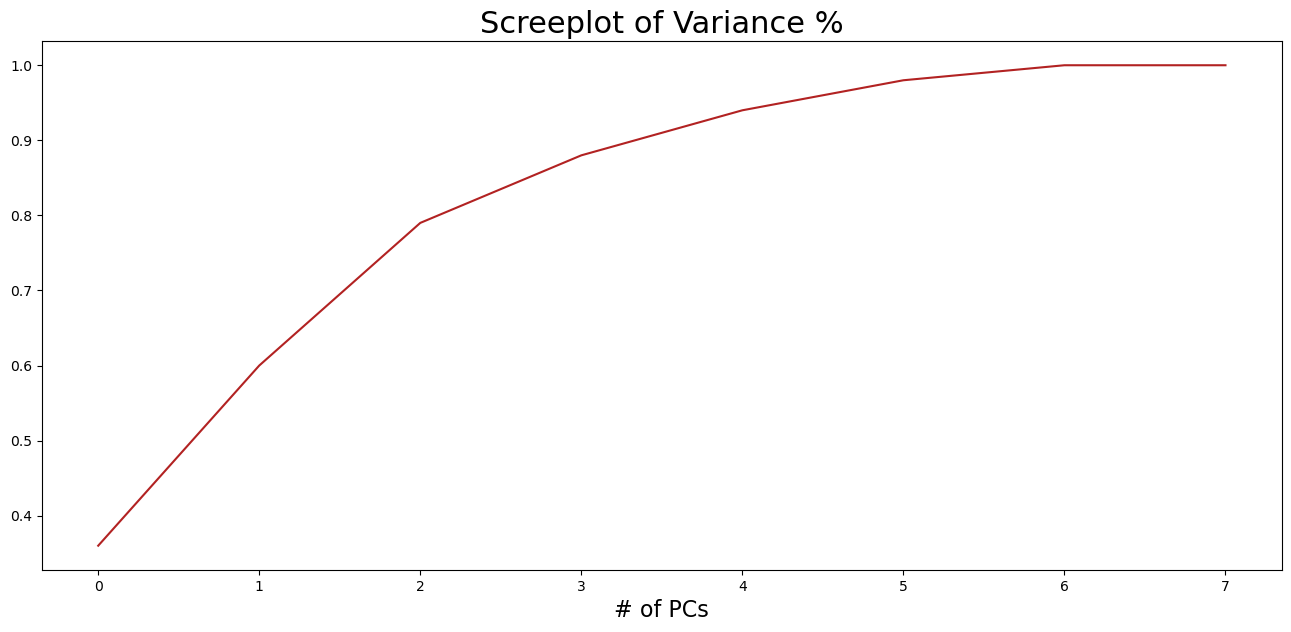

In [35]:
variance_exp_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_exp_cumsum, color='firebrick')
plt.title('Screeplot of Variance %', fontsize=22)
plt.xlabel('# of PCs', fontsize=16)
plt.savefig('Screeplot.png', dpi=100)
plt.show()

In [21]:
from scipy.spatial import ConvexHull #https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html

def encircle(x,y, ax=None, **kw): #https://book.pythontips.com/en/latest/args_and_kwargs.html
    if not ax: ax=plt.gca()     #https://www.geeksforgeeks.org/matplotlib-pyplot-gca-in-python/
    p = np.c_[x,y]
#Explanation of p = np.c_[x,y]: https://numpy.org/doc/stable/reference/generated/numpy.c_.html
#np.c_[np.array([1,2,3]), np.array([4,5,6])]
#array([[1, 4],
#       [2, 5],
#       [3, 6]])
#np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
#array([[1, 2, 3, ..., 4, 5, 6]])
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

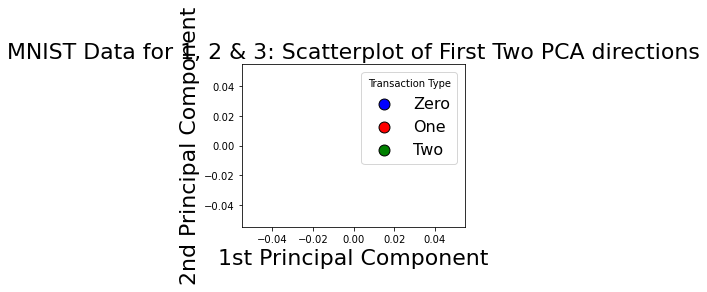

In [22]:
df_pca.round(2)
    
# Scatterplot against PC1 and PC2
fig, ax = plt.subplots(1,1, figsize=(4,3))

# Row masks for each category
rows_0 = Y==0;
rows_1 = Y==1; 
rows_2 = Y==2; 

# Plot
ax.scatter(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], c='blue', edgecolor='k', s=120, label='Zero')
ax.scatter(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], c='red', edgecolor='k', s=120, label='One')
ax.scatter(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], c='green', edgecolor='k', s=120, label='Two')

# Encircle the boundaries
#encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="blue", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="firebrick", fc="none", linewidth=2.5)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="green", fc="none", linewidth=2.5)

# Shading
#encircle(df_pca.loc[rows_1.tolist(), 1], df_pca.loc[rows_1.tolist(), 2], ec="k", fc="firebrick", alpha=0.05)
#encircle(df_pca.loc[rows_0.tolist(), 1], df_pca.loc[rows_0.tolist(), 2], ec="k", fc="blue", alpha=0.05)
#encircle(df_pca.loc[rows_2.tolist(), 1], df_pca.loc[rows_2.tolist(), 2], ec="k", fc="green", alpha=0.05)

# Labels
ax.set_title("MNIST Data for 1, 2 & 3: Scatterplot of First Two PCA directions", fontsize=22)
ax.set_xlabel("1st Principal Component", fontsize=22)
ax.set_ylabel("2nd Principal Component", fontsize=22)
ax.legend(loc='best', title='Transaction Type', fontsize=16)
plt.show();

In [23]:
df_pca.loc[rows_0.tolist(), 1]

Series([], Name: 1, dtype: float64)

In [24]:
print(df_pca.loc[rows_0.tolist(), 1])

Series([], Name: 1, dtype: float64)


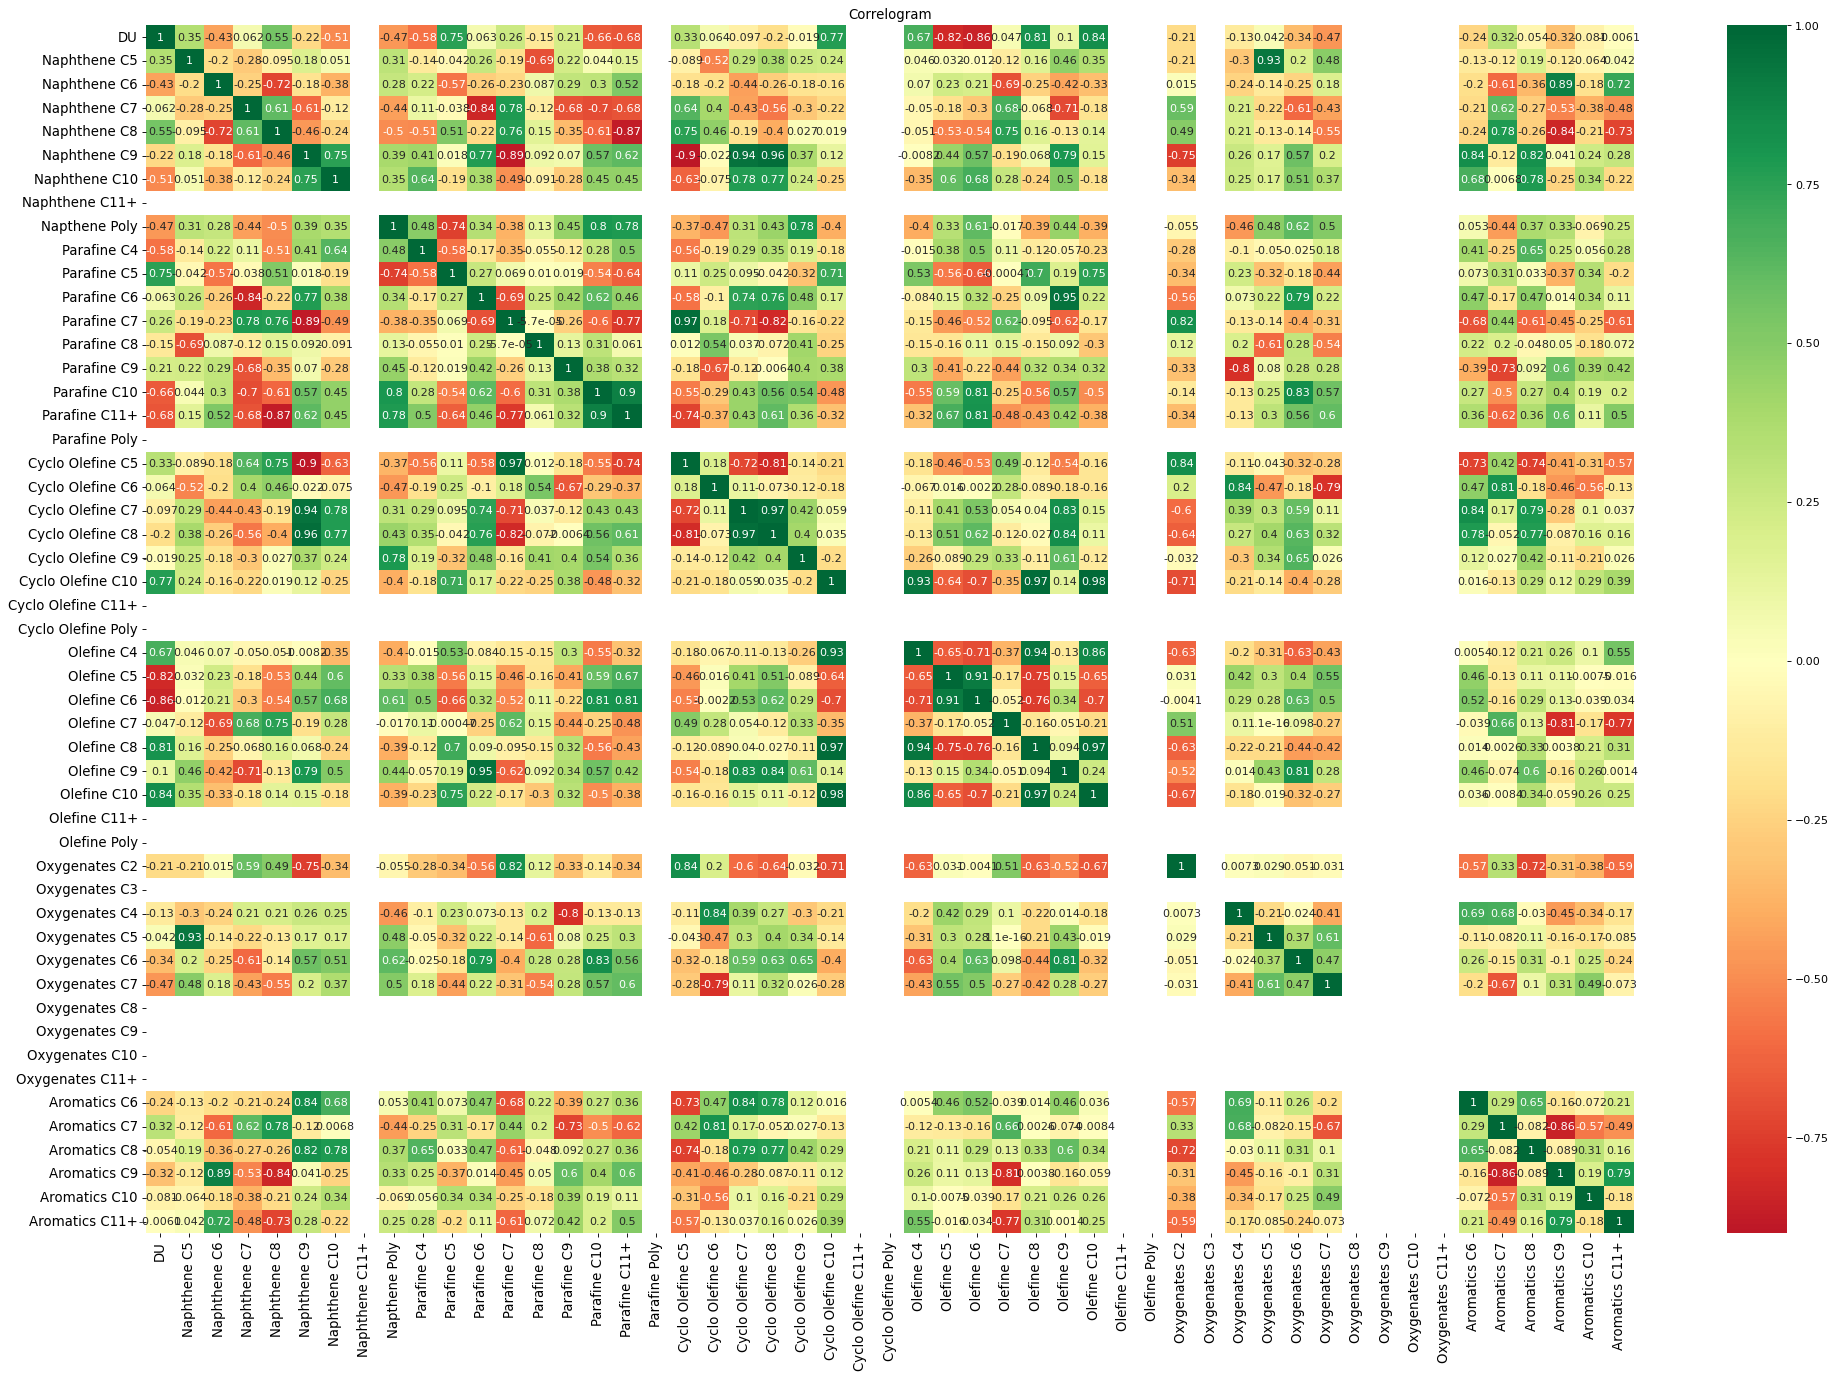

In [25]:
df_pca.round(2) 
plt.figure(figsize=(30,20), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

plt.title('Correlogram', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Correlogram.png', dpi=100) #always before plotting
plt.show()

In [ ]:
df
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="DU")
plt.show()

In [ ]:
df_pca
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="reg", hue="DU")
plt.show()